In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
mnist.train.num_examples

In [7]:
mnist.train.images.shape

(55000, 784)

In [ ]:
mnist.train.images[0]

In [ ]:
mnist.train.images[1].reshape(28, 28)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


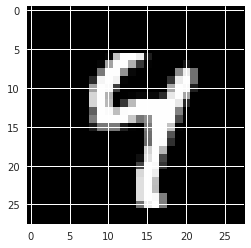

In [6]:
plt.imshow(mnist.train.images[2].reshape(28, 28), cmap='gist_gray')

In [11]:
X_ph = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784, 10]), name='W')
b = tf.Variable(tf.zeros([10, ]))

# Prep the model as y_hat = W*X_ph + b

In [13]:
y_hat = tf.add(tf.matmul(X_ph, W), b)

# Prep the loss function (softmax)

In [15]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_hat))

# Prep optimizer

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5, name='GradientDescent')

train = optimizer.minimize(loss)

In [34]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  
  # batch process
  batch_size = 100
  
  # define epoch
  epoch = 1001
  
  for step in range(epoch):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train, feed_dict={X_ph: batch_x, y_true: batch_y})
    
    if (step % 100 == 0):
      ret_loss = sess.run([loss], feed_dict={X_ph: batch_x, y_true: batch_y})
      print("step -> %d, current loss is %s" %(step, ret_loss))
      
  # Evaluate the Model
  correct_predict = tf.equal(tf.argmax(input=y_hat, axis=1), tf.argmax(input=y_true, axis=1))
  
  acc = tf.reduce_mean(tf.cast(correct_predict, dtype=tf.float32))
  
  
  print(sess.run([acc], feed_dict={X_ph: mnist.test.images, y_true: mnist.test.labels}))
  
  W_train = sess.run([W])
  
  
  
  

step -> 0, current loss is [1.6674594]
step -> 100, current loss is [0.27078292]
step -> 200, current loss is [0.3930758]
step -> 300, current loss is [0.33286995]
step -> 400, current loss is [0.29448467]
step -> 500, current loss is [0.2710801]
step -> 600, current loss is [0.26838833]
step -> 700, current loss is [0.31977305]
step -> 800, current loss is [0.15497203]
step -> 900, current loss is [0.35275462]
step -> 1000, current loss is [0.16472617]
[0.9188]


In [37]:
import numpy as np

In [38]:
W_np = np.asarray(W_train)

In [46]:
W_np.shape

(1, 784, 10)

In [49]:
W_np[0][:,0].shape

(784,)

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


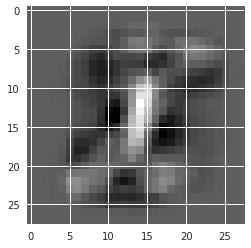

In [59]:
plt.imshow(W_np[0][:,1].reshape(28, 28), cmap='gist_gray')